In [1]:
!pip install PyDrive

    100% |████████████████████████████████| 993kB 21.5MB/s 
  Running setup.py bdist_wheel for PyDrive ... - \ done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1pY8Rs7KRjoC2Pb47AJgBKPOs1_P2tLpH'})
download.GetContentFile('dataset.tar')

In [6]:
!ls

adc.json  dataset.tar  sample_data


In [7]:
!tar -xvf dataset.tar

./dataset/
./dataset/19/
./dataset/19/2356.jpg
./dataset/19/1465.jpg
./dataset/19/1355.jpg
./dataset/19/655.jpg
./dataset/19/739.jpg
./dataset/19/1359.jpg
./dataset/19/1836.jpg
./dataset/19/1640.jpg
./dataset/19/644.jpg
./dataset/19/2274.jpg
./dataset/19/1830.jpg
./dataset/19/1607.jpg
./dataset/19/602.jpg
./dataset/19/263.jpg
./dataset/19/1475.jpg
./dataset/19/1060.jpg
./dataset/19/757.jpg
./dataset/19/1627.jpg
./dataset/19/787.jpg
./dataset/19/1592.jpg
./dataset/19/1276.jpg
./dataset/19/913.jpg
./dataset/19/861.jpg
./dataset/19/1890.jpg
./dataset/19/2001.jpg
./dataset/19/483.jpg
./dataset/19/2131.jpg
./dataset/19/1321.jpg
./dataset/19/103.jpg
./dataset/19/355.jpg
./dataset/19/92.jpg
./dataset/19/455.jpg
./dataset/19/1039.jpg
./dataset/19/2230.jpg
./dataset/19/61.jpg
./dataset/19/1165.jpg
./dataset/19/90.jpg
./dataset/19/2142.jpg
./dataset/19/1488.jpg
./dataset/19/1824.jpg
./dataset/19/881.jpg
./dataset/19/2212.jpg
./dataset/19/1076.jpg
./dataset/19/874.jpg
./dataset/19/1924.jpg
./data

In [0]:
os.listdir('dataset')

In [8]:
!ls

adc.json  dataset  dataset.tar	sample_data


In [9]:
import os
import cv2
import numpy as np
import pickle
from sklearn.model_selection import train_test_split


def get_images_labels():
    images = []
    labels = []
    for label in os.listdir('dataset'):
        for i in range(2400):
            img = cv2.imread('./dataset/'+ label + '/{}.jpg'.format(i+1), 0)
            images.append(np.array(img, dtype=np.uint8))
            labels.append(label)

    return images, labels

images, labels = get_images_labels()
images = np.array(images, dtype="float")
labels = np.array(labels)
print('Size of images', len(images))
print('Size of labels', len(labels))
(Xtrain, Xtest, Ytrain, Ytest) = train_test_split(images, labels, test_size=0.3, random_state=42)
print('Size of Xtrain', Xtrain.shape)
print('Size of Xtest', Xtest.shape)
print('Size of Ytrain', Ytrain.shape)
print('Size of Ytest', Ytest.shape)



Size of images 105600
Size of labels 105600
Size of Xtrain (73920, 50, 50)
Size of Xtest (31680, 50, 50)
Size of Ytrain (73920,)
Size of Ytest (31680,)


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.utils import plot_model
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [11]:
# fix random seed
np.random.seed(7)
num_pixels = Xtrain.shape[1] * Xtrain.shape[2]
print(num_pixels)
#flattening the image for training
Xtrain = Xtrain.reshape(Xtrain.shape[0], 1, 50, 50).astype('float32')
Xtest = Xtest.reshape(Xtest.shape[0], 1, 50, 50).astype('float32')
#normalizing input
Xtrain /= 255
Xtest /= 255
#setting the output
Ytrain = np_utils.to_categorical(Ytrain)
Ytest = np_utils.to_categorical(Ytest)
print(Ytrain.shape)
print(Ytest.shape)
num_classes = Ytest.shape[1]

print(num_classes)

2500
(73920, 44)
(31680, 44)
44


In [0]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=5,input_shape=(1, 50, 50), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
    model.add(Conv2D(64, kernel_size=3,activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size=3, activation = 'relu'))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Dense(44, activation = "softmax"))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [13]:
model = cnn_model()
history = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=20, batch_size=512, verbose=2)
scores = model.evaluate(Xtest, Ytest, verbose=0)
print('CNN Error {}'.format(100-scores[1]*100))

Train on 73920 samples, validate on 31680 samples
Epoch 1/20
 - 24s - loss: 1.1527 - acc: 0.6766 - val_loss: 0.0477 - val_acc: 0.9879
Epoch 2/20
 - 21s - loss: 0.0923 - acc: 0.9700 - val_loss: 0.0052 - val_acc: 0.9983
Epoch 3/20
 - 21s - loss: 0.0388 - acc: 0.9884 - val_loss: 0.0015 - val_acc: 0.9997
Epoch 4/20
 - 21s - loss: 0.0255 - acc: 0.9924 - val_loss: 7.3982e-04 - val_acc: 0.9997
Epoch 5/20
 - 21s - loss: 0.0187 - acc: 0.9944 - val_loss: 1.9038e-04 - val_acc: 1.0000
Epoch 6/20
 - 21s - loss: 0.0172 - acc: 0.9948 - val_loss: 7.1042e-04 - val_acc: 0.9998
Epoch 7/20
 - 21s - loss: 0.0141 - acc: 0.9960 - val_loss: 1.1870e-04 - val_acc: 0.9999
Epoch 8/20
 - 21s - loss: 0.0153 - acc: 0.9959 - val_loss: 3.1149e-04 - val_acc: 0.9998
Epoch 9/20
 - 21s - loss: 0.0131 - acc: 0.9962 - val_loss: 0.0010 - val_acc: 0.9997
Epoch 10/20
 - 21s - loss: 0.0105 - acc: 0.9971 - val_loss: 2.7836e-04 - val_acc: 0.9999
Epoch 11/20
 - 21s - loss: 0.0076 - acc: 0.9979 - val_loss: 2.4697e-04 - val_acc: 0.9

In [14]:
model.summary()
model.save('data_new.h5')
print('Model is being saved')
print(history.history.keys())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 46, 46)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 23, 23)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 23, 23)        92        
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 23, 23)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 21, 21)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 19, 19)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 9, 9)          0         
__________

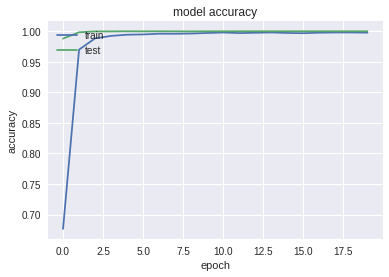

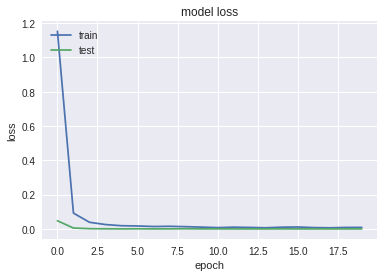

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
